<a href="https://colab.research.google.com/github/huynhspm/Basic_ML/blob/main/Image%20Classification/Mnist_Fashion_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import time

In [2]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


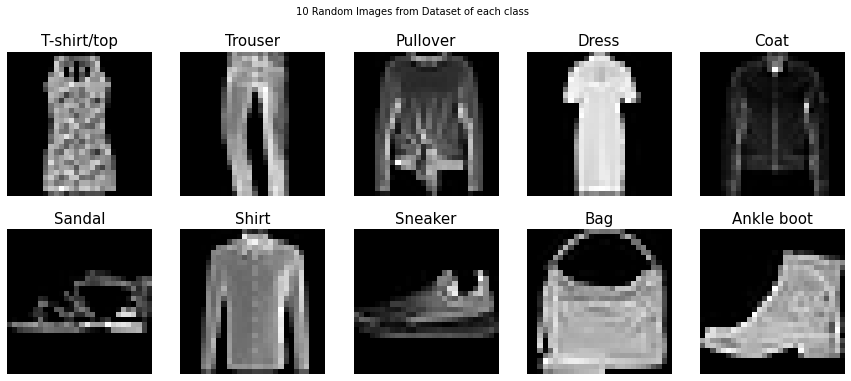

In [3]:
# 3. show image
def get_ten_random_images():
  d = {}
  while len(d.keys()) < 10:
      idx = random.randint(0, len(y_train)-1)
      if y_train[idx] not in d.keys():
          d[y_train[idx]] = idx
  return d

d = get_ten_random_images()
rows = 2
cols = 5
fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]], cmap = 'gray')
    axes[i-1].axis('off')
    axes[i-1].set_title(label[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 10)
plt.show()

In [4]:
# 4. prepare data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
# 5. build model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [13]:
# 6. train model
start_time = time.time()
H = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=10, verbose=1)
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4244 - accuracy: 0.8498 - val_loss: 0.3252 - val_accuracy: 0.8821
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2948 - accuracy: 0.8927 - val_loss: 0.2862 - val_accuracy: 0.8953
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2521 - accuracy: 0.9069 - val_loss: 0.2804 - val_accuracy: 0.8996
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2224 - accuracy: 0.9171 - val_loss: 0.2497 - val_accuracy: 0.9095
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1988 - accuracy: 0.9255 - val_loss: 0.2424 - val_accuracy: 0.9118
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1778 - accuracy: 0.9335 - val_loss: 0.2516 - val_accuracy: 0.9143
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1591 - accuracy: 0.9397 - val_loss: 0.2417 - val_accuracy:

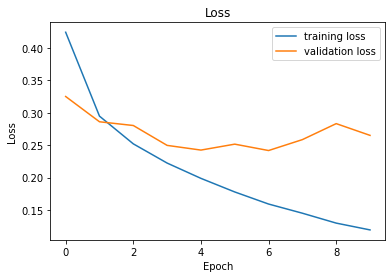

In [14]:
# 7. Vẽ đồ thị loss của traning set và validation set
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

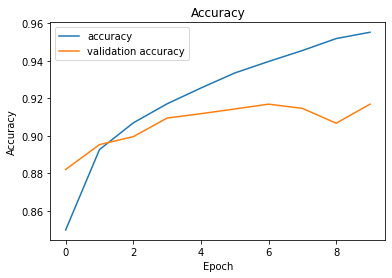

In [15]:
# 8. Vẽ đồ thị accuracy của traning set và validation set
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [16]:
# 9. Đánh giá model với testset
start_time = time.time()
print('neural network: ', model.evaluate(X_test, y_test, verbose = 1))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

313/313 [==============================] - 2s 6ms/step - loss: 0.2745 - accuracy: 0.9110
neural network:  [0.27446448802948, 0.9110000133514404]
Running time: 2.46 (s)


[[1.2684075e-07 6.5794273e-11 1.7321554e-07 7.7251507e-08 9.1809982e-09
  3.5276728e-06 1.2525401e-09 7.9274684e-04 3.1213442e-08 9.9920338e-01]]
Giá trị dự đoán:  9


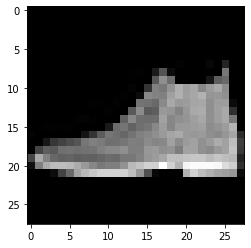

In [17]:
# 10. predict
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print(y_predict)
print('Giá trị dự đoán: ', np.argmax(y_predict))